coding: utf-8

In[1]:

In [ ]:
import pandas as pd
import numpy as np
#import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string

In[2]:

In [ ]:
df_fake = pd.read_csv("Fake.csv")
df_true = pd.read_csv("True.csv")

In[3]:

In [ ]:
df_fake.head()

In[4]:

In [ ]:
df_true.head(5)

In[5]:

In [ ]:
df_fake["class"] = 0
df_true["class"] = 1

In[6]:

In [ ]:
df_fake.shape, df_true.shape

In[7]:

In [ ]:

for i in range(23480,23470,-1):
    df_fake.drop([i], axis = 0, inplace = True)
    
    

for i in range(21416,21406,-1):
    df_true.drop([i], axis = 0, inplace = True)
df_manual_testing = pd.concat([df_fake_manual_testing,df_true_manual_testing], axis = 0)
df_manual_testing.to_csv("manual_testing.csv")    

In[8]:

In [ ]:
df_fake.shape, df_true.shape

In[9]:

In[10]:

In[11]:

In[12]:

In [ ]:
df_merge = pd.concat([df_fake, df_true], axis =0 )
df_merge.head(10)

In[13]:

In [ ]:
df_merge.columns

In[14]:

In [104]:
df = df_merge.drop(["title", "subject","date"], axis = 1)

In[15]:

In [105]:
df.isnull().sum()

text     0
class    0
dtype: int64

In[16]:

In [ ]:
df = df.sample(frac = 1)

In[17]:

In [107]:
df.head()

,text,class
7966,Right-wing morons everywhere are panicking abo...,0
2711,"Donald Trump was once a Democrat, but that s n...",0
22622,"Appear weak when you are strong, and strong w...",0
467,Donald Trump is a horrible president. Everyone...,0
14613,KABUL (Reuters) - A suicide bomb attack in the...,1


In[18]:

In [108]:
df.reset_index(inplace = True)
df.drop(["index"], axis = 1, inplace = True)

In[19]:

In[20]:

In [109]:
df.head()

,text,class
0,Right-wing morons everywhere are panicking abo...,0
1,"Donald Trump was once a Democrat, but that s n...",0
2,"Appear weak when you are strong, and strong w...",0
3,Donald Trump is a horrible president. Everyone...,0
4,KABUL (Reuters) - A suicide bomb attack in the...,1


In[21]:

In [110]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

In[22]:

In [111]:
df["text"] = df["text"].apply(wordopt)

In[23]:

In [112]:
x = df["text"]
y = df["class"]

In[24]:

In [113]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In[25]:

In [114]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [115]:
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

In [116]:
import matplotlib.pyplot as plt

In [117]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [118]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()
from sklearn import metrics
import numpy as np
import itertools

accuracy:   0.937
Confusion matrix, without normalization


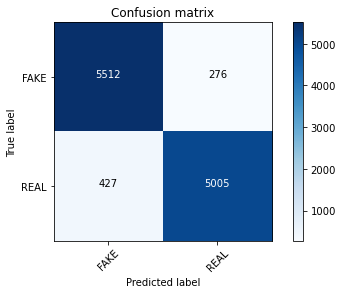

In [119]:
classifier.fit(xv_train, y_train)
pred = classifier.predict(xv_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In[26]:

In [120]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      5788
           1       0.95      0.92      0.93      5432

    accuracy                           0.94     11220
   macro avg       0.94      0.94      0.94     11220
weighted avg       0.94      0.94      0.94     11220



In[27]:

In[28]:

In[29]:

In[30]:

In[31]:

In[32]:

In[33]:

In[34]:

In[35]:

In[36]:

In[37]:

In[ ]:

In[38]:

In[39]:

In[40]:

In[41]:

In[42]:

In [121]:
def output_lable(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "Not A Fake News"
    
def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wordopt) 
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    
    pred_MNNB = classifier.predict(new_xv_test)
    return print("\n\nMNNB Prediction: {} ".format(output_lable(pred_MNNB[0])))

In[43]:

In [ ]:
news = str(input())
manual_testing(news)

In[45]:

In[ ]: